In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# goal of this project is determine how three different products (fitness trackers) differ given data on their user bases.
# data used = https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness

In [10]:
data = pd.read_csv('/home/jan-willem/Documents/Kaggle beginner projects/cardiogoodfitness/CardioGoodFitness.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [13]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [31]:
quant_var = ['Age','Education','Usage','Fitness','Income','Miles']

In [113]:
base = pd.DataFrame(data.groupby(['Product','Gender','MaritalStatus'])[['Education']].count()['Education'])

In [128]:
add = data.groupby(['Product','Gender','MaritalStatus'])[quant_var].mean()[quant_var]
add = round(add, 1)

In [115]:
ind = np.array(list(base.index))

In [76]:
table = pd.DataFrame(np.concatenate([ind, base.values, add.values], axis=1))
tab_names = ['Product','Gender','MaritalStatus','Count'] + quant_var
table.columns = tab_names
table

,Product,Gender,MaritalStatus,Count,Age,Education,Usage,Fitness,Income,Miles
0,TM195,Female,Partnered,27,28.3,14.9,2.9,2.9,46153.8,74.9
1,TM195,Female,Single,13,28.7,15.5,3.0,2.9,45742.4,78.8
2,TM195,Male,Partnered,21,31.4,15.4,3.3,2.9,50028.0,80.2
3,TM195,Male,Single,19,25.6,14.5,3.3,3.3,43265.8,99.5
4,TM498,Female,Partnered,15,30.0,15.2,3.3,2.9,49724.8,94.0
5,TM498,Female,Single,14,28.1,15.2,2.9,2.8,48920.4,80.2
6,TM498,Male,Partnered,21,30.4,15.3,2.9,2.9,49378.3,87.2
7,TM498,Male,Single,10,25.2,14.5,3.3,3.0,47071.8,91.1
8,TM798,Female,Partnered,4,29.0,17.5,5.2,5.0,84972.2,215.0
9,TM798,Female,Single,3,24.3,18.3,4.7,4.0,58516.0,133.3


In [120]:
# heatmap 
table[['Count','Age','Education','Usage','Fitness','Income','Miles']] = table[['Count','Age','Education','Usage','Fitness','Income','Miles']].astype(float)
div = round(table[['Count','Age','Education','Usage','Fitness','Income','Miles']] / table[['Count','Age','Education','Usage','Fitness','Income','Miles']].mean().values, 2)
over = pd.DataFrame(np.concatenate([ind, div.values], axis=1))
over.columns = tab_names
over

,Product,Gender,MaritalStatus,Count,Age,Education,Usage,Fitness,Income,Miles
0,TM195,Female,Partnered,1.8,1.0,0.94,0.79,0.83,0.82,0.66
1,TM195,Female,Single,0.87,1.01,0.98,0.81,0.83,0.82,0.7
2,TM195,Male,Partnered,1.4,1.11,0.97,0.9,0.83,0.89,0.71
3,TM195,Male,Single,1.27,0.9,0.91,0.9,0.95,0.77,0.88
4,TM498,Female,Partnered,1.0,1.06,0.96,0.9,0.83,0.89,0.83
5,TM498,Female,Single,0.93,0.99,0.96,0.79,0.8,0.87,0.71
6,TM498,Male,Partnered,1.4,1.07,0.96,0.79,0.83,0.88,0.77
7,TM498,Male,Single,0.67,0.89,0.91,0.9,0.86,0.84,0.8
8,TM798,Female,Partnered,0.27,1.02,1.1,1.41,1.44,1.51,1.9
9,TM798,Female,Single,0.2,0.86,1.15,1.28,1.15,1.04,1.18


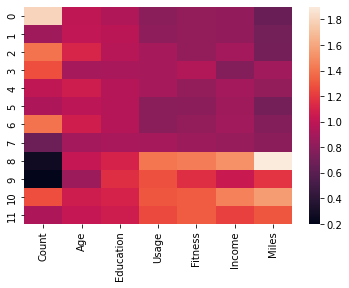

In [122]:
sns.heatmap(div)
plt.show()

In [75]:
table[table['Product'] == 'TM798']
# TM798 is heavy duty user demographic, skews heavily male, higher eduction, higher income and higher usage, miles and fitness

,Product,Gender,MaritalStatus,Count,Age,Education,Usage,Fitness,Income,Miles
8,TM798,Female,Partnered,4,29.0,17.5,5.2,5.0,84972.2,215.0
9,TM798,Female,Single,3,24.3,18.3,4.7,4.0,58516.0,133.3
10,TM798,Male,Partnered,19,30.0,17.4,4.8,4.6,81431.4,176.3
11,TM798,Male,Single,14,28.9,16.9,4.6,4.6,68216.4,147.6


In [ ]:
# other two are harder to differentiate. On surface they look similar. 

In [123]:
# there might be something the mean isn't telling us, check for standard deviation?

In [142]:
std = data.groupby(['Product','Gender','MaritalStatus'])[quant_var].std()[quant_var]
std = round(add, 1)
std

Age  Education  Usage  Fitness   Income  Miles
Product Gender MaritalStatus                                                 
TM195   Female Partnered      28.3       14.9    2.9      2.9  46153.8   74.9
               Single         28.7       15.5    3.0      2.9  45742.4   78.8
        Male   Partnered      31.4       15.4    3.3      2.9  50028.0   80.2
               Single         25.6       14.5    3.3      3.3  43265.8   99.5
TM498   Female Partnered      30.0       15.2    3.3      2.9  49724.8   94.0
               Single         28.1       15.2    2.9      2.8  48920.4   80.2
        Male   Partnered      30.4       15.3    2.9      2.9  49378.3   87.2
               Single         25.2       14.5    3.3      3.0  47071.8   91.1
TM798   Female Partnered      29.0       17.5    5.2      5.0  84972.2  215.0
               Single         24.3       18.3    4.7      4.0  58516.0  133.3
        Male   Partnered      30.0       17.4    4.8      4.6  81431.4  176.3
               Single         28.9       16.9    4.6      4.6  68216.4  147.6

In [ ]:
# nothing that jumps out, nothing that we already know. 

In [138]:
data['Gender2'] = 0
data['Gender2'][data['Gender'] == 'Male'] = 1

/tmp/ipykernel_148526/2664451913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender2'][data['Gender'] == 'Male'] = 1


In [140]:
data['MaritalStatus2'] = 0
data['MaritalStatus2'][data['MaritalStatus'] == 'Partnered'] = 1

/tmp/ipykernel_148526/3127152849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MaritalStatus2'][data['MaritalStatus'] == 'Partnered'] = 1


In [143]:
# product positioning in biplot with pca.  

In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
scaler = StandardScaler()

varlist = quant_var + ['Gender2', 'MaritalStatus2']
data_scaled = scaler.fit_transform(data[varlist])
data_pca = pca.fit_transform(data_scaled)
x_new = data_pca

data_pca = pd.DataFrame(x_new)
data_pca.columns = ['PC'+str(i) for i in range(1,9)]
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.933682,-2.524888,-0.622615,-0.310378,-0.039789,-0.806632,-0.265394,0.025192
1,-1.842354,-1.559425,-0.705677,-0.893576,0.701847,-0.746044,0.079969,0.351902
2,-1.632340,-0.933821,0.700179,1.702490,0.264502,0.469357,-0.469105,-0.629659
3,-1.971323,-2.317736,-0.986041,-0.256121,-0.795098,0.040806,0.326315,-0.248496
4,-1.979422,-0.891883,-1.405477,1.156778,0.195666,1.330149,-0.017021,-0.554006
...,...,...,...,...,...,...,...,...
175,5.069127,0.382158,0.653129,-1.847910,0.726279,0.439537,-0.925529,0.545013
176,3.739930,0.660581,0.096030,-1.735282,-0.690084,0.630217,0.252848,0.738444
177,3.530146,0.578871,-0.174802,-1.687246,-1.777981,0.098701,0.061624,-0.601191
178,3.713936,2.699025,-0.581751,-0.808051,-0.460716,-0.635060,0.348110,-0.903616


In [166]:
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02
mean,7.894919e-17,6.908054e-17,3.947460e-17,3.947460e-17,2.960595e-17,-4.317534e-18,1.973730e-17,1.850372e-17
std,1.848555e+00,1.208065e+00,9.582151e-01,9.493193e-01,7.825888e-01,5.753058e-01,4.911801e-01,4.050338e-01
min,-3.004559e+00,-2.563128e+00,-1.729746e+00,-2.011166e+00,-2.232914e+00,-1.461459e+00,-1.144532e+00,-1.023663e+00
25%,-1.333575e+00,-8.761036e-01,-8.213936e-01,-7.602651e-01,-4.832467e-01,-2.855685e-01,-3.205125e-01,-2.264063e-01
50%,-3.324706e-01,-1.080073e-01,-1.965927e-01,-1.412359e-02,-3.574016e-02,-2.649735e-02,2.782595e-02,2.496256e-02
75%,7.446268e-01,9.098237e-01,8.001762e-01,8.571149e-01,4.176432e-01,4.789312e-01,3.079674e-01,2.317211e-01
max,5.069127e+00,3.186979e+00,2.183642e+00,2.445024e+00,2.771780e+00,1.478578e+00,1.430066e+00,2.310397e+00


/tmp/ipykernel_148526/343645835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product2'][data['Product'] =='TM498'] = 2
/tmp/ipykernel_148526/343645835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product2'][data['Product'] =='TM798'] = 3


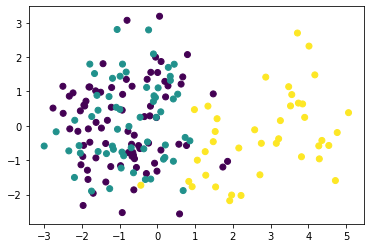

In [176]:
data['Product2'] = 1
data['Product2'][data['Product'] =='TM498'] = 2
data['Product2'][data['Product'] =='TM798'] = 3 

plt.scatter(data_pca['PC1'], data_pca['PC2'], c = data['Product2'])
plt.show()

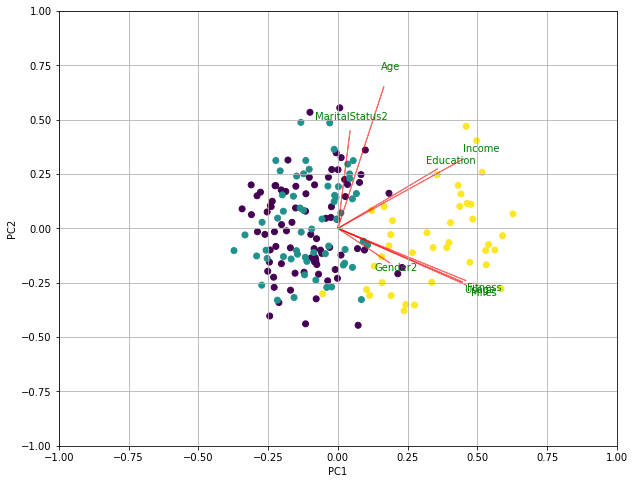

In [177]:
def myplot(score,coeff,labels=varlist):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = data['Product2'])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#call the function. use only the first 2 PCs.
plt.figure(figsize=(10,8 ))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
# We see confirmation of what we already knew, that the heavy usage product's users are outliers who care a lot about their fitness, are higher educated and have higher income. 
# The only conclusion I can draw with regards to the overlapping products are the same (just different branding)
# and in being the same they are for casual users who like their fitness but are average in every regard (income, education, marital status, fitness)